In [220]:
import xarray as xr
import pandas as pd

In [221]:
wind_data = xr.open_dataset("wind_2023.nc")

In [185]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87600 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84722 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84722 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                84722 non-null  float32        
 5   station_latitude                 84722 non-null  float32        
 6   station_height                   84722 non-null  float64        
 7   station_name                     87600 non-null  object         
 8   state                            87600 non-null  object         
 9   era5_wind_speed                  84722 non

In [110]:
wind_data.dims

Frozen({'station_id': 10, 'time': 8760})

In [222]:
def display_attributes(wind_data):
    """
    This function displays the attributes of each variable and coordinate in the given Xarray Dataset.

    Args:
    wind_data (xr.Dataset): The Xarray Dataset containing the data and metadata.

    Output:
    Prints the metadata (attributes) of each variable and coordinate in the dataset.

    This function iterates over all variables and coordinates in the provided Xarray Dataset. For each item,
    it checks if there are any attributes. If attributes are present, it prints the name of the variable or coordinate
    along with its attributes in a formatted manner.

    Example Usage:
    display_attributes(wind_data)
    """
    atr_var = list(wind_data.data_vars) + list(wind_data.coords)
    for i in atr_var: 
        if wind_data[i].attrs:
            print(f'Attributes for {i}:')
            for key, val in wind_data[i].attrs.items():
                print(f'  {key}: {val}')

# Display attributes
display_attributes(wind_data)


Attributes for icon_d2_run:
  long_name: initial time of forecast
  standard_name: forecast_reference_time
Attributes for icon_d2_step:
  long_name: time since forecast_reference_time
  standard_name: forecast_period
Attributes for icon_eu_run:
  long_name: initial time of forecast
  standard_name: forecast_reference_time
Attributes for icon_eu_step:
  long_name: time since forecast_reference_time
  standard_name: forecast_period


In [124]:
wind_data

<xarray.Dataset>
Dimensions:                          (station_id: 10, time: 8760)
Coordinates: (12/13)
  * station_id                       (station_id) int64 303 433 ... 5426 15207
  * time                             (time) datetime64[ns] 2023-01-01 ... 202...
    station_longitude                (station_id) float32 13.5 13.4 ... 9.359
    station_latitude                 (station_id) float32 52.06 52.47 ... 51.28
    station_height                   (station_id) float64 55.0 48.0 ... 317.0
    station_name                     (station_id) object 'Baruth' ... 'Schaue...
    ...                               ...
    longitude                        (station_id) float32 13.5 13.4 ... 9.359
    latitude                         (station_id) float32 52.06 52.47 ... 51.28
    icon_d2_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_d2_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
    icon_eu_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_eu_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
Data variables:
    measured_wind_direction_quality  (station_id, time) float64 10.0 ... 1.0
    measured_wind_speed_quality      (station_id, time) float64 10.0 ... 1.0
    measured_wind_direction          (station_id, time) float64 230.0 ... 200.0
    measured_wind_speed              (station_id, time) float64 8.9 8.5 ... 4.8
    era5_wind_speed                  (station_id, time) float32 7.45 ... 5.91
    era5_wind_direction              (station_id, time) float32 232.5 ... 199.0
    icon_d2_wind_speed               (station_id, time) float64 6.731 ... 5.655
    icon_d2_wind_direction           (station_id, time) float64 224.7 ... 208.8
    icon_eu_wind_speed               (station_id, time) float64 6.162 ... 4.909
    icon_eu_wind_direction           (station_id, time) float64 221.0 ... 198.0

In [69]:
wind_data['measured_wind_direction_quality'].sel(station_id = 303)

<xarray.DataArray 'measured_wind_direction_quality' (time: 8760)>
array([10., 10., 10., ...,  1.,  1.,  1.])
Coordinates: (12/13)
    station_id         int64 303
  * time               (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
    station_longitude  float32 13.5
    station_latitude   float32 52.06
    station_height     float64 55.0
    station_name       object 'Baruth'
    ...                 ...
    longitude          float32 13.5
    latitude           float32 52.06
    icon_d2_run        (time) datetime64[ns] 2023-01-01 ... 2023-12-31T21:00:00
    icon_d2_step       (time) timedelta64[ns] 00:00:00 01:00:00 ... 02:00:00
    icon_eu_run        (time) datetime64[ns] 2023-01-01 ... 2023-12-31T21:00:00
    icon_eu_step       (time) timedelta64[ns] 00:00:00 01:00:00 ... 02:00:00

In [163]:
data_dropped = wind_data.dropna(dim = 'time', subset=['measured_wind_speed'])

In [192]:


# Step 2: Identify missing values in a specific column (variable)
# Example: Find missing values in 'measured_wind_speed'
missing_values = data['measured_wind_speed'].isnull()

# Count the number of missing values
num_missing_values = missing_values.sum().item()

# Print the number of missing values
print(f'Number of missing values in measured_wind_speed: {num_missing_values}')

# Optionally, you can print the indices of missing values
# missing_indices = missing_values.where(missing_values, drop=True)
# print(f'Indices of missing values in measured_wind_speed:\n{missing_indices}')


Number of missing values in measured_wind_speed: 2878


In [193]:
data_cleaned = data.dropna(dim='time', subset=['measured_wind_speed'])
data_cleaned

<xarray.Dataset>
Dimensions:                          (station_id: 10, time: 6287)
Coordinates: (12/13)
  * station_id                       (station_id) int64 303 433 ... 5426 15207
  * time                             (time) datetime64[ns] 2023-01-01 ... 202...
    station_longitude                (station_id) float32 13.5 13.4 ... 9.359
    station_latitude                 (station_id) float32 52.06 52.47 ... 51.28
    station_height                   (station_id) float64 55.0 48.0 ... 317.0
    station_name                     (station_id) object 'Baruth' ... 'Schaue...
    ...                               ...
    longitude                        (station_id) float32 13.5 13.4 ... 9.359
    latitude                         (station_id) float32 52.06 52.47 ... 51.28
    icon_d2_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_d2_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
    icon_eu_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_eu_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
Data variables:
    measured_wind_direction_quality  (station_id, time) float64 10.0 ... 1.0
    measured_wind_speed_quality      (station_id, time) float64 10.0 ... 1.0
    measured_wind_direction          (station_id, time) float64 230.0 ... 200.0
    measured_wind_speed              (station_id, time) float64 8.9 8.5 ... 4.8
    era5_wind_speed                  (station_id, time) float32 7.45 ... 5.91
    era5_wind_direction              (station_id, time) float32 232.5 ... 199.0
    icon_d2_wind_speed               (station_id, time) float64 6.731 ... 5.655
    icon_d2_wind_direction           (station_id, time) float64 224.7 ... 208.8
    icon_eu_wind_speed               (station_id, time) float64 6.162 ... 4.909
    icon_eu_wind_direction           (station_id, time) float64 221.0 ... 198.0

In [195]:
df_cleaned = df.dropna( subset=['measured_wind_speed','measured_wind_direction'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84722 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84722 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84722 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                84722 non-null  float32        
 5   station_latitude                 84722 non-null  float32        
 6   station_height                   84722 non-null  float64        
 7   station_name                     84722 non-null  object         
 8   state                            84722 non-null  object         
 9   era5_wind_speed                  84722 non

In [150]:
(5990/ 8760) * 100

68.37899543378995

In [144]:
data_dropped

<xarray.Dataset>
Dimensions:                          (station_id: 10, time: 5990)
Coordinates: (12/13)
  * station_id                       (station_id) int64 303 433 ... 5426 15207
  * time                             (time) datetime64[ns] 2023-01-01 ... 202...
    station_longitude                (station_id) float32 13.5 13.4 ... 9.359
    station_latitude                 (station_id) float32 52.06 52.47 ... 51.28
    station_height                   (station_id) float64 55.0 48.0 ... 317.0
    station_name                     (station_id) object 'Baruth' ... 'Schaue...
    ...                               ...
    longitude                        (station_id) float32 13.5 13.4 ... 9.359
    latitude                         (station_id) float32 52.06 52.47 ... 51.28
    icon_d2_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_d2_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
    icon_eu_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_eu_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
Data variables:
    measured_wind_direction_quality  (station_id, time) float64 10.0 ... 1.0
    measured_wind_speed_quality      (station_id, time) float64 10.0 ... 1.0
    measured_wind_direction          (station_id, time) float64 230.0 ... 200.0
    measured_wind_speed              (station_id, time) float64 8.9 8.5 ... 4.8
    era5_wind_speed                  (station_id, time) float32 7.45 ... 5.91
    era5_wind_direction              (station_id, time) float32 232.5 ... 199.0
    icon_d2_wind_speed               (station_id, time) float64 6.731 ... 5.655
    icon_d2_wind_direction           (station_id, time) float64 224.7 ... 208.8
    icon_eu_wind_speed               (station_id, time) float64 6.162 ... 4.909
    icon_eu_wind_direction           (station_id, time) float64 221.0 ... 198.0

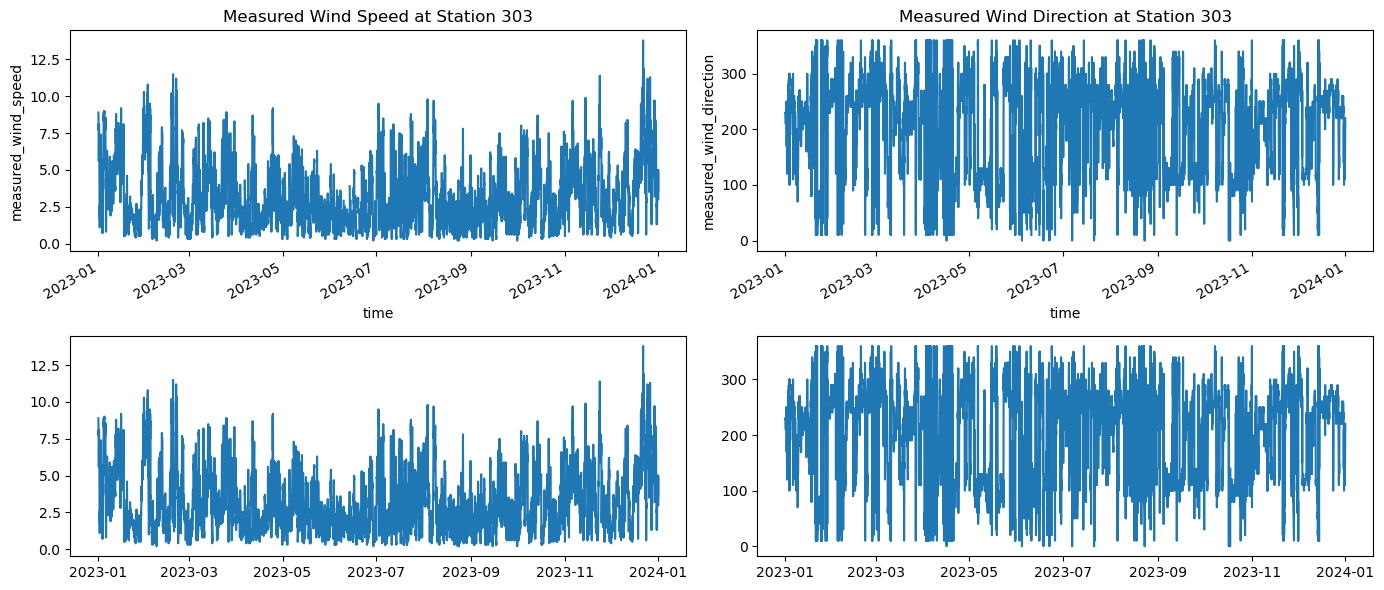

In [200]:
import matplotlib.pyplot as plt

# Assuming wind_data is your xarray dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
df_station_303 = df_cleaned.xs(303, level='station_id')
# Plot measured wind speed for station_id 303
wind_data['measured_wind_speed'].sel(station_id=303).plot(ax=axes[0][0])
axes[0][0].set_title('Measured Wind Speed at Station 303')

# Plot measured wind direction for station_id 303
wind_data['measured_wind_direction'].sel(station_id=303).plot(ax=axes[0][1])
axes[0][1].set_title('Measured Wind Direction at Station 303')
axes[1][0].plot(df_station_303.index.get_level_values('time'), df_station_303['measured_wind_speed'], label='Measured Wind Direction')
axes[1][1].plot(df_station_303.index.get_level_values('time'), df_station_303['measured_wind_direction'], label='Measured Wind Direction')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


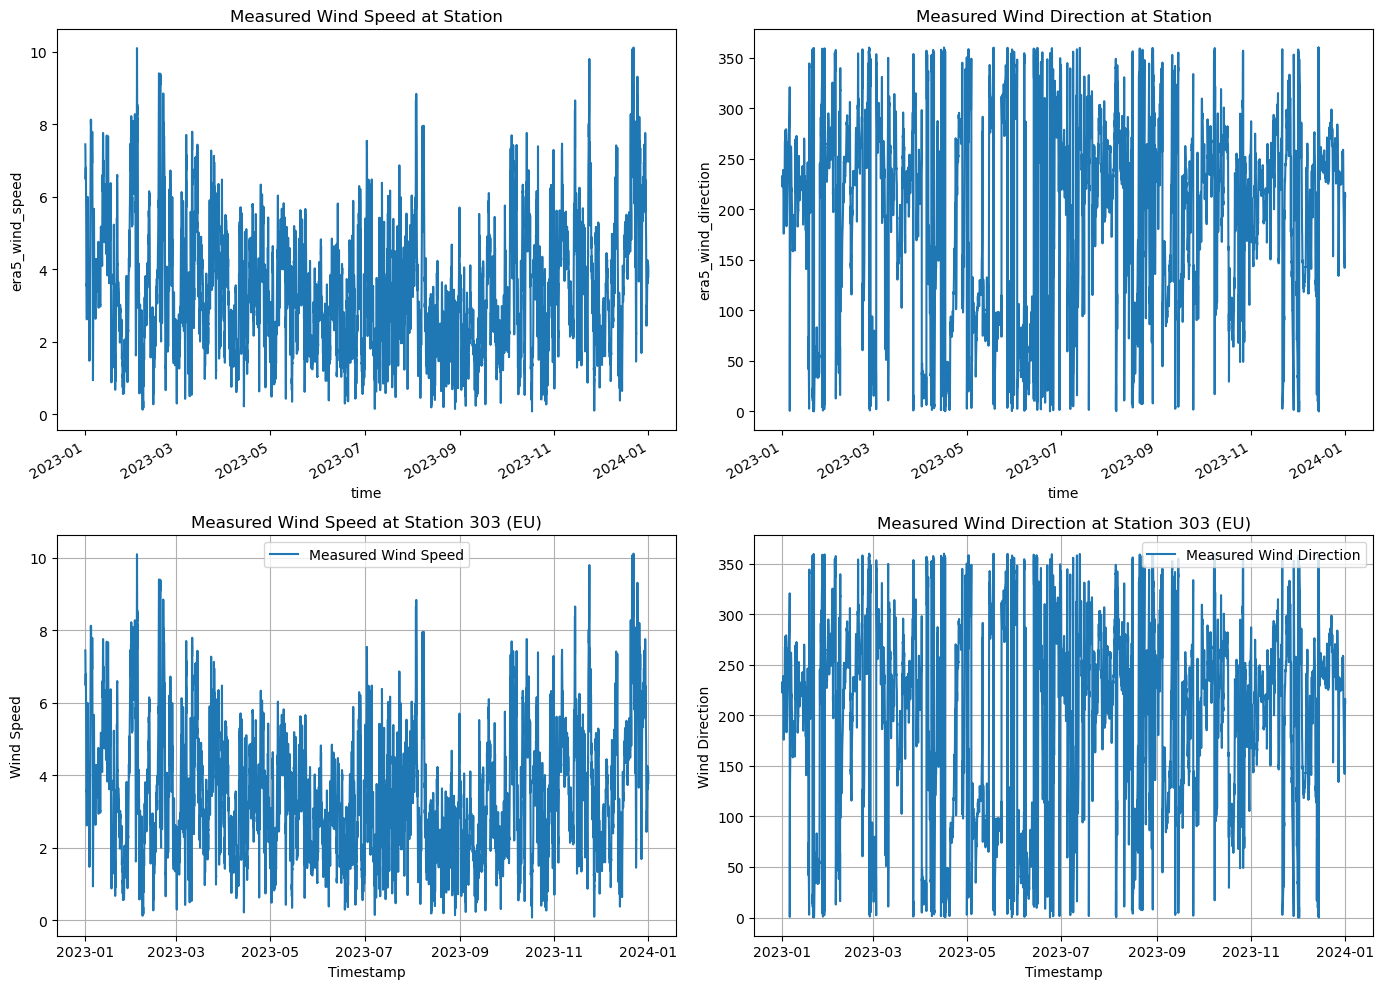

In [201]:
import matplotlib.pyplot as plt

# Assuming wind_data is your xarray dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Filter the DataFrame for station_id 303
df_station_303_us = df_cleaned.xs(303,level='station_id')
df_station_303_eu = df_cleaned.xs(303,level='station_id')

# Plot measured wind speed for station_id 303 from xarray dataset (US)
wind_data['era5_wind_speed'].sel(station_id=303).plot(ax=axes[0, 0])
axes[0, 0].set_title('Measured Wind Speed at Station')

# Plot measured wind direction for station_id 303 from xarray dataset (US)
wind_data['era5_wind_direction'].sel(station_id=303).plot(ax=axes[0, 1])
axes[0, 1].set_title('Measured Wind Direction at Station')

# Plot measured wind speed for station_id 303 from cleaned DataFrame (EU)
axes[1, 0].plot(df_station_303_eu.index.get_level_values('time'), df_station_303_eu['era5_wind_speed'], label='Measured Wind Speed')
axes[1, 0].set_title('Measured Wind Speed at Station 303 (EU)')
axes[1, 0].set_xlabel('Timestamp')
axes[1, 0].set_ylabel('Wind Speed')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot measured wind direction for station_id 303 from cleaned DataFrame (EU)
axes[1, 1].plot(df_station_303_eu.index.get_level_values('time'), df_station_303_eu['era5_wind_direction'], label='Measured Wind Direction')
axes[1, 1].set_title('Measured Wind Direction at Station 303 (EU)')
axes[1, 1].set_xlabel('Timestamp')
axes[1, 1].set_ylabel('Wind Direction')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [129]:
# Summary statistics of missing data
missing_summary = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'missing_count': missing_summary,
    'missing_percentage': missing_percentage
})

print(missing_data_summary)


                                 missing_count  missing_percentage
measured_wind_direction_quality           2835            3.236301
measured_wind_speed_quality               2878            3.285388
measured_wind_direction                   2835            3.236301
measured_wind_speed                       2878            3.285388
station_longitude                            0            0.000000
station_latitude                             0            0.000000
station_height                               0            0.000000
station_name                                 0            0.000000
state                                        0            0.000000
era5_wind_speed                           1488            1.698630
era5_wind_direction                       1488            1.698630
icon_d2_run                                  0            0.000000
icon_d2_step                              3090            3.527397
icon_d2_wind_speed                        4738            5.40

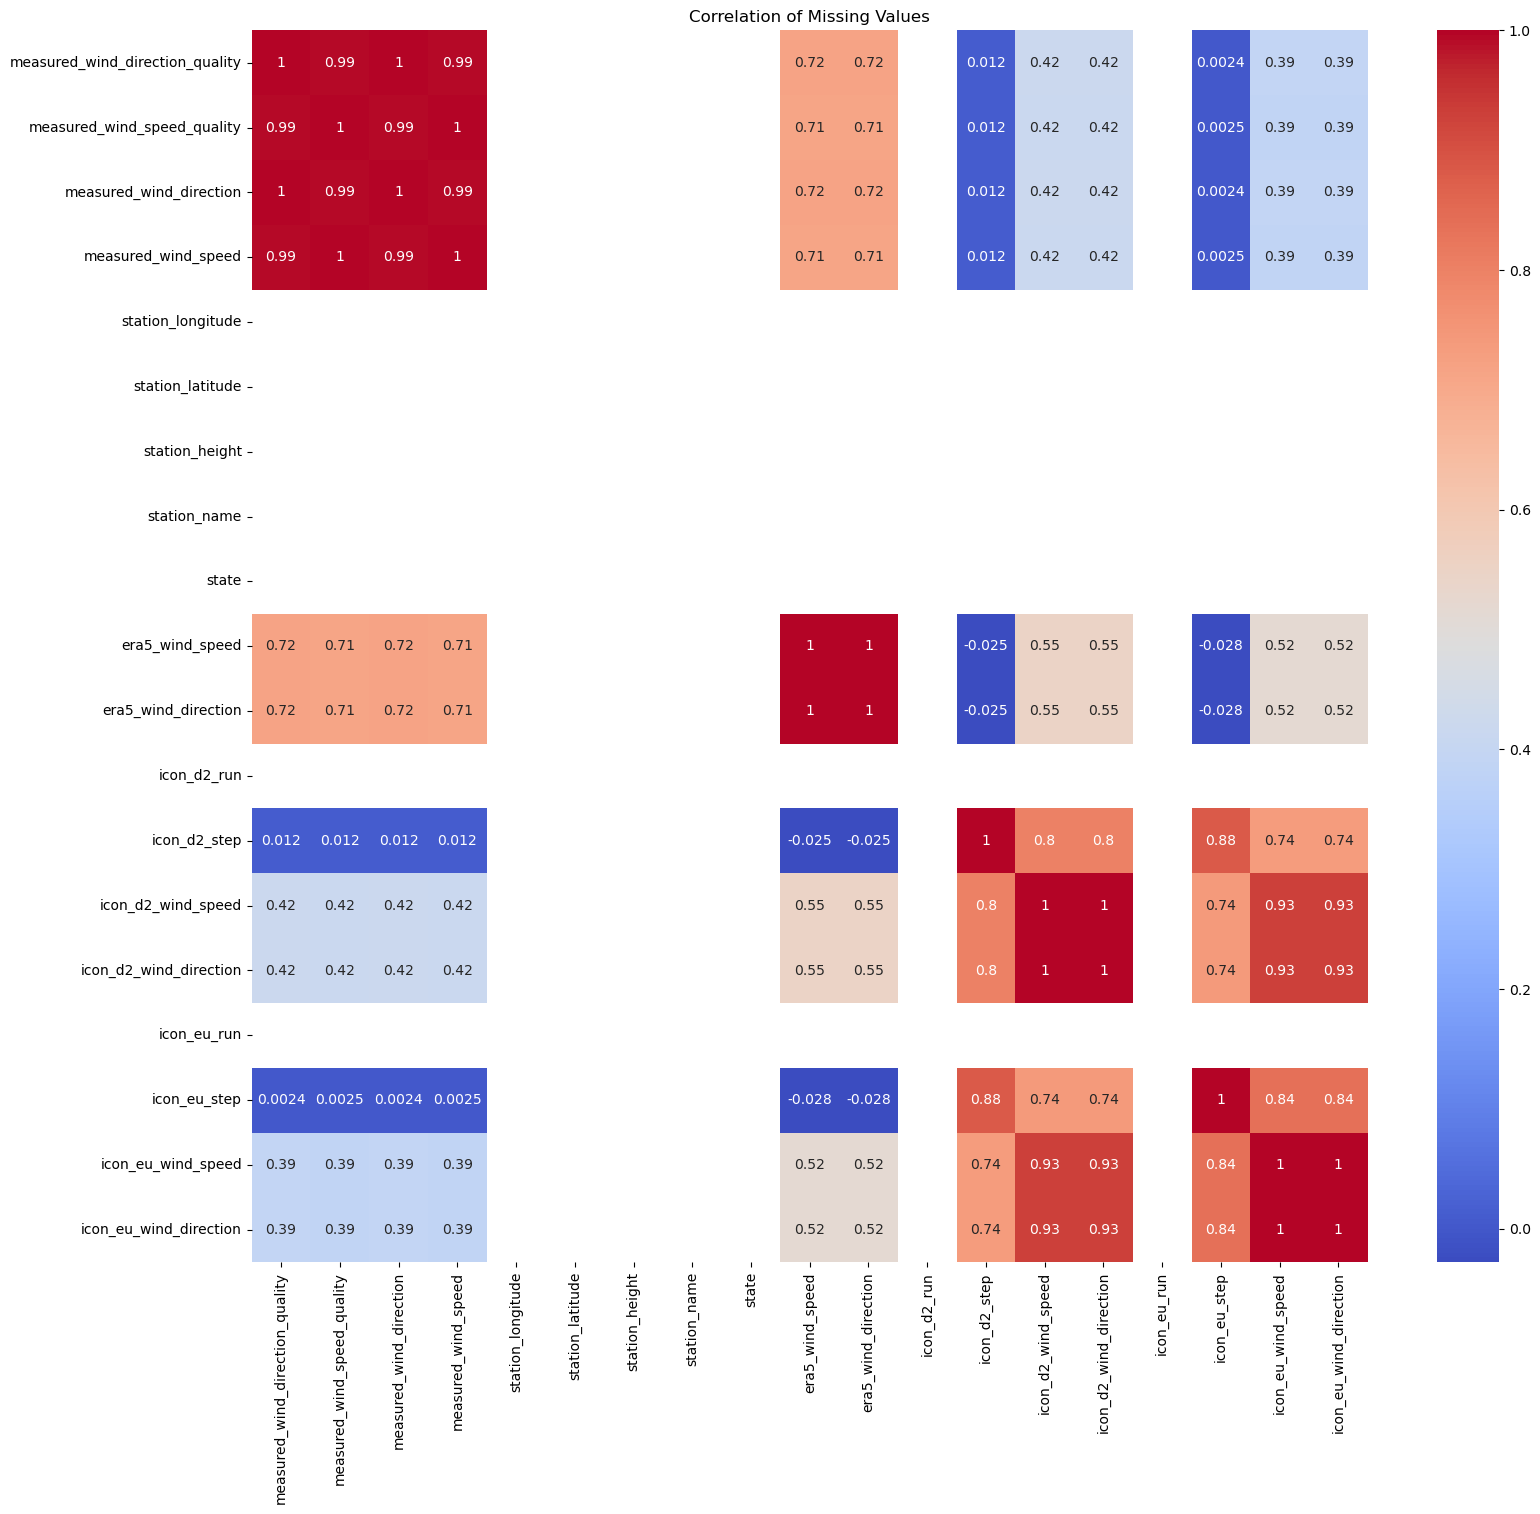

In [133]:
# Create a DataFrame indicating the presence of missing values (1 if missing, 0 if not)
missing_indicator = df.isna().astype(int)

# Compute the correlation matrix of missing values
missing_correlation = missing_indicator.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 16))
sns.heatmap(missing_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Missing Values')
plt.show()


<Figure size 1200x600 with 0 Axes>

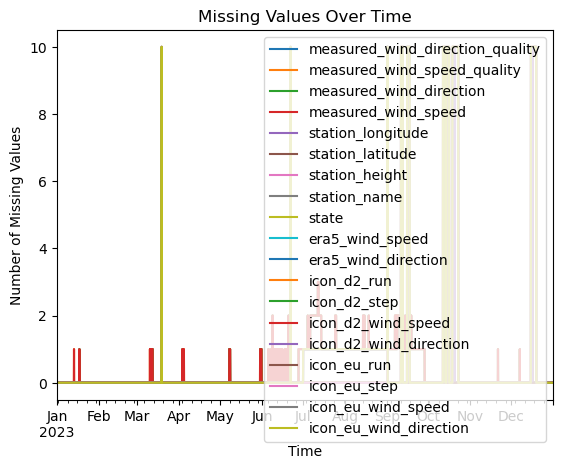

In [140]:
# Analyze missing patterns over time
missing_over_time = df.isna().groupby(df.index.get_level_values('time')).sum()

plt.figure(figsize=(12, 6))
missing_over_time.plot()
plt.title('Missing Values Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Missing Values')
plt.show()




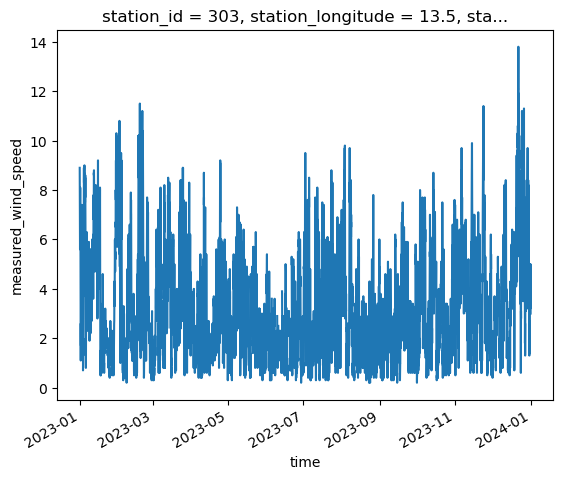

In [45]:
wind_data['measured_wind_speed'].sel(station_id=303).plot()

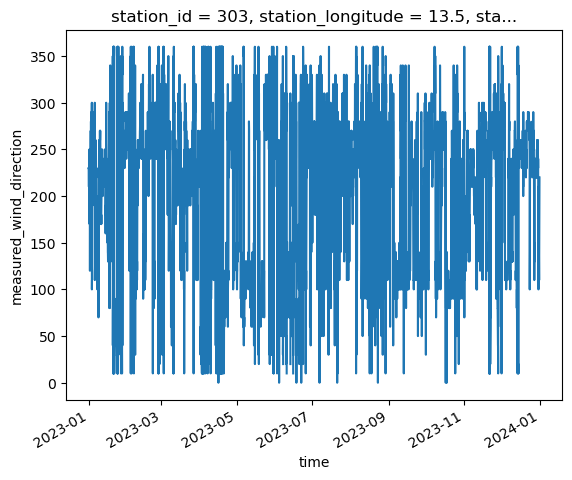

In [126]:
wind_data['measured_wind_direction'].sel(station_id=303).plot()

In [224]:
# Function to check if two DataArrays are identical
def are_identical(da1, da2):
    return da1.equals(da2)

# Get the list of variable names (including both data variables and coordinates)
data = wind_data
variables = list(data.data_vars) + list(data.coords)

# Find duplicate variables
duplicates = []
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        if are_identical(data[var1], data[var2]):
            duplicates.append((var1, var2))

# Print the duplicate variables
for var1, var2 in duplicates:
    print(f"Variables '{var1}' and '{var2}' are identical.")

# Remove the duplicate columns
vars_to_drop = set()
for var1, var2 in duplicates:
    vars_to_drop.add(var2)  # Keep var1 and drop var2

# Drop the identified duplicate variables
data_cleaned = data.drop_vars(list(vars_to_drop))

# Verify the result by listing remaining variables
# print("Remaining variables:")
# print(data_cleaned)


Variables 'station_longitude' and 'longitude' are identical.
Variables 'station_latitude' and 'latitude' are identical.


In [74]:
data_cleaned

<xarray.Dataset>
Dimensions:                          (station_id: 10, time: 8760)
Coordinates:
  * station_id                       (station_id) int64 303 433 ... 5426 15207
  * time                             (time) datetime64[ns] 2023-01-01 ... 202...
    station_longitude                (station_id) float32 13.5 13.4 ... 9.359
    station_latitude                 (station_id) float32 52.06 52.47 ... 51.28
    station_height                   (station_id) float64 55.0 48.0 ... 317.0
    station_name                     (station_id) object 'Baruth' ... 'Schaue...
    state                            (station_id) object 'Brandenburg' ... 'H...
    icon_d2_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_d2_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
    icon_eu_run                      (time) datetime64[ns] 2023-01-01 ... 202...
    icon_eu_step                     (time) timedelta64[ns] 00:00:00 ... 02:0...
Data variables:
    measured_wind_direction_quality  (station_id, time) float64 10.0 ... 1.0
    measured_wind_speed_quality      (station_id, time) float64 10.0 ... 1.0
    measured_wind_direction          (station_id, time) float64 230.0 ... 200.0
    measured_wind_speed              (station_id, time) float64 8.9 8.5 ... 4.8
    era5_wind_speed                  (station_id, time) float32 7.45 ... 5.91
    era5_wind_direction              (station_id, time) float32 232.5 ... 199.0
    icon_d2_wind_speed               (station_id, time) float64 6.731 ... 5.655
    icon_d2_wind_direction           (station_id, time) float64 224.7 ... 208.8
    icon_eu_wind_speed               (station_id, time) float64 6.162 ... 4.909
    icon_eu_wind_direction           (station_id, time) float64 221.0 ... 198.0

In [73]:


# Display the first few entries of the run and step variables
print("ICON-D2 run times:")
data['icon_d2_run'].isel(time=slice(0, 5))

print("ICON-D2 steps:")
data['icon_d2_step'].isel(time=slice(0, 5))

print("ICON-EU run times:")
data['icon_eu_run'].isel(time=slice(0, 5))

print("ICON-EU steps:")
data['icon_eu_step'].isel(time=slice(0, 5))


ICON-D2 run times:
ICON-D2 steps:
ICON-EU run times:
ICON-EU steps:


<xarray.DataArray 'icon_eu_step' (time: 5)>
array([            0, 3600000000000, 7200000000000,             0,
       3600000000000], dtype='timedelta64[ns]')
Coordinates:
  * time          (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
    icon_d2_run   (time) datetime64[ns] 2023-01-01 ... 2023-01-01T03:00:00
    icon_d2_step  (time) timedelta64[ns] 00:00:00 01:00:00 ... 00:00:00 01:00:00
    icon_eu_run   (time) datetime64[ns] 2023-01-01 ... 2023-01-01T03:00:00
    icon_eu_step  (time) timedelta64[ns] 00:00:00 01:00:00 ... 00:00:00 01:00:00
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

# Data Wrangling: Pandas Exploration

In [251]:
# df = wind_data.to_dataframe().reset_index()
df = data_cleaned.to_dataframe()


In [252]:
df.head(10)

measured_wind_direction_quality  \
station_id time                                                   
303        2023-01-01 00:00:00                             10.0   
           2023-01-01 01:00:00                             10.0   
           2023-01-01 02:00:00                             10.0   
           2023-01-01 03:00:00                             10.0   
           2023-01-01 04:00:00                             10.0   
           2023-01-01 05:00:00                             10.0   
           2023-01-01 06:00:00                             10.0   
           2023-01-01 07:00:00                             10.0   
           2023-01-01 08:00:00                             10.0   
           2023-01-01 09:00:00                             10.0   

                                measured_wind_speed_quality  \
station_id time                                               
303        2023-01-01 00:00:00                         10.0   
           2023-01-01 01:00:00                         10.0   
           2023-01-01 02:00:00                         10.0   
           2023-01-01 03:00:00                         10.0   
           2023-01-01 04:00:00                         10.0   
           2023-01-01 05:00:00                         10.0   
           2023-01-01 06:00:00                         10.0   
           2023-01-01 07:00:00                         10.0   
           2023-01-01 08:00:00                         10.0   
           2023-01-01 09:00:00                         10.0   

                                measured_wind_direction  measured_wind_speed  \
station_id time                                                                
303        2023-01-01 00:00:00                    230.0                  8.9   
           2023-01-01 01:00:00                    230.0                  8.5   
           2023-01-01 02:00:00                    230.0                  8.1   
           2023-01-01 03:00:00                    230.0                  7.7   
           2023-01-01 04:00:00                    220.0                  8.1   
           2023-01-01 05:00:00                    220.0                  6.1   
           2023-01-01 06:00:00                    210.0                  5.6   
           2023-01-01 07:00:00                    230.0                  7.2   
           2023-01-01 08:00:00                    230.0                  7.5   
           2023-01-01 09:00:00                    220.0                  7.7   

                                station_longitude  station_latitude  \
station_id time                                                       
303        2023-01-01 00:00:00            13.4997         52.061298   
           2023-01-01 01:00:00            13.4997         52.061298   
           2023-01-01 02:00:00            13.4997         52.061298   
           2023-01-01 03:00:00            13.4997         52.061298   
           2023-01-01 04:00:00            13.4997         52.061298   
           2023-01-01 05:00:00            13.4997         52.061298   
           2023-01-01 06:00:00            13.4997         52.061298   
           2023-01-01 07:00:00            13.4997         52.061298   
           2023-01-01 08:00:00            13.4997         52.061298   
           2023-01-01 09:00:00            13.4997         52.061298   

                                station_height station_name        state  \
station_id time                                                            
303        2023-01-01 00:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 01:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 02:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 03:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 04:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 05:00:00            55.0       Baruth  Brandenburg   
           2023-01-01 06:00:00            55.0  

In [109]:
df[['icon_d2_run', 'icon_d2_step']]

icon_d2_run    icon_d2_step
station_id time                                                   
303        2023-01-01 00:00:00 2023-01-01 00:00:00 0 days 00:00:00
           2023-01-01 01:00:00 2023-01-01 00:00:00 0 days 01:00:00
           2023-01-01 02:00:00 2023-01-01 00:00:00 0 days 02:00:00
           2023-01-01 03:00:00 2023-01-01 03:00:00 0 days 00:00:00
           2023-01-01 04:00:00 2023-01-01 03:00:00 0 days 01:00:00
...                                            ...             ...
15207      2023-12-31 19:00:00 2023-12-31 18:00:00 0 days 01:00:00
           2023-12-31 20:00:00 2023-12-31 18:00:00 0 days 02:00:00
           2023-12-31 21:00:00 2023-12-31 21:00:00 0 days 00:00:00
           2023-12-31 22:00:00 2023-12-31 21:00:00 0 days 01:00:00
           2023-12-31 23:00:00 2023-12-31 21:00:00 0 days 02:00:00

[87600 rows x 2 columns]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87600 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84765 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84765 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                87600 non-null  float32        
 5   station_latitude                 87600 non-null  float32        
 6   station_height                   87600 non-null  float64        
 7   station_name                     87600 non-null  object         
 8   state                            87600 non-null  object         
 9   era5_wind_speed                  86112 non

In [102]:
df.describe()

,measured_wind_direction_quality,measured_wind_speed_quality,measured_wind_direction,measured_wind_speed,station_longitude,station_latitude,station_height,era5_wind_speed,era5_wind_direction,icon_d2_run,icon_d2_step,icon_d2_wind_speed,icon_d2_wind_direction,icon_eu_run,icon_eu_step,icon_eu_wind_speed,icon_eu_wind_direction
count,84765.000000,84722.000000,84765.000000,84722.000000,87600.000000,87600.000000,87600.000000,86112.000000,86112.000000,87600,84510,82862.000000,82862.000000,87600,83820,82302.000000,82302.000000
mean,5.708960,5.709308,197.798502,4.064315,10.547482,51.469696,254.200000,3.662302,194.885590,2023-06-22 01:45:38.219177984,0 days 01:00:19.169329073,3.419431,196.273013,2023-06-19 17:24:03.698630144,0 days 01:00:19.327129563,3.082472,196.631621
min,1.000000,1.000000,0.000000,0.200000,8.121200,48.385101,3.000000,0.026401,0.020123,2023-01-01 00:00:00,0 days 00:00:00,0.015429,0.015939,2023-01-01 00:00:00,0 days 00:00:00,0.006602,0.008219
25%,3.000000,3.000000,120.000000,2.100000,9.010500,49.375801,48.000000,2.166054,121.808380,2023-03-20 08:15:00,0 days 00:00:00,1.866274,118.480991,2023-03-17 11:15:00,0 days 00:00:00,1.528168,124.368506
50%,3.000000,3.000000,220.000000,3.400000,10.094950,51.672400,151.500000,3.333695,218.634338,2023-06-19 13:30:00,0 days 01:00:00,3.076968,216.760882,2023-06-16 18:00:00,0 days 01:00:00,2.691300,216.198136
75%,10.000000,10.000000,270.000000,5.300000,11.929300,53.533199,501.000000,4.816863,260.375122,2023-09-22 12:45:00,0 days 02:00:00,4.574682,268.229034,2023-09-19 21:00:00,0 days 02:00:00,4.170308,265.950681
max,10.000000,10.000000,360.000000,22.300000,13.499700,54.069099,755.000000,13.382693,359.987396,2023-12-31 21:00:00,0 days 03:00:00,14.932095,359.996104,2023-12-31 21:00:00,0 days 03:00:00,15.237837,359.988394
std,3.757826,3.758011,92.250508,2.745654,1.848877,1.957883,254.864477,1.926131,91.702393,NaN,0 days 00:49:14.174663934,2.030903,93.242681,NaN,0 days 00:49:14.295567325,1.996673,92.770855


In [85]:
df.measured_wind_direction_quality.unique(), df.measured_wind_speed_quality.unique()`

(array([10.,  3., nan,  1.]), array([10.,  3., nan,  1.]))

In [86]:
df.measured_wind_direction_quality.value_counts()

measured_wind_direction_quality
3.0     36844
10.0    36163
1.0     11758
Name: count, dtype: int64

In [87]:
df.measured_wind_speed_quality.value_counts()

measured_wind_speed_quality
3.0     36816
10.0    36150
1.0     11756
Name: count, dtype: int64

In [94]:
df.index.get_level_values('station_id').unique()

Index([303, 433, 701, 1200, 2023, 3402, 3821, 4625, 5426, 15207], dtype='int64', name='station_id')

In [213]:
for i in df.index.get_level_values('station_id').unique():
    df_433 = df.loc[i]
    print(f'Counts_{i}:{df_433.count()[0]}')

Counts_303:8621
Counts_433:8745
Counts_701:8581
Counts_1200:8756
Counts_2023:8760
Counts_3402:8698
Counts_3821:8609
Counts_4625:6533
Counts_5426:8665
Counts_15207:8754


/tmp/ipykernel_2487/4110127124.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Counts_{i}:{df_433.count()[0]}')
/tmp/ipykernel_2487/4110127124.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Counts_{i}:{df_433.count()[0]}')
/tmp/ipykernel_2487/4110127124.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Counts_{i}:{df_433.count()[0]}')
/tmp/ipykernel_2487/4110127124.py:3: FutureWarning: Series.__get

In [89]:
df_433.measured_wind_speed_quality.value_counts()

measured_wind_speed_quality
3.0     3951
10.0    3618
1.0     1176
Name: count, dtype: int64

In [90]:
df_433.measured_wind_speed_quality.value_counts()

measured_wind_speed_quality
3.0     3951
10.0    3618
1.0     1176
Name: count, dtype: int64

In [26]:
df.index[2][0]

303

In [31]:
# Find unique values in a specific level of the index
unique_index_values = df.index.get_level_values('station_id').unique()
print(unique_index_values)

Index([303, 433, 701, 1200, 2023, 3402, 3821, 4625, 5426, 15207], dtype='int64', name='station_id')


In [125]:
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)


measured_wind_direction_quality    3.236301
measured_wind_speed_quality        3.285388
measured_wind_direction            3.236301
measured_wind_speed                3.285388
station_longitude                  0.000000
station_latitude                   0.000000
station_height                     0.000000
station_name                       0.000000
state                              0.000000
era5_wind_speed                    1.698630
era5_wind_direction                1.698630
icon_d2_run                        0.000000
icon_d2_step                       3.527397
icon_d2_wind_speed                 5.408676
icon_d2_wind_direction             5.408676
icon_eu_run                        0.000000
icon_eu_step                       4.315068
icon_eu_wind_speed                 6.047945
icon_eu_wind_direction             6.047945
dtype: float64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87600 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84765 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84765 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                87600 non-null  float32        
 5   station_latitude                 87600 non-null  float32        
 6   station_height                   87600 non-null  float64        
 7   station_name                     87600 non-null  object         
 8   state                            87600 non-null  object         
 9   longitude                        87600 non

# Fighting the missing values
- Categorical data: find the mode and fill the missing values in that
- Numerical Data: Fill it with the mean of that feature
- Either we can remove these rows if they are less in number of missing values and we have large dataset and doesnot effect our results.

In [54]:
df.duplicated(subset=['station_name'])

station_id  time               
303         2023-01-01 00:00:00    False
            2023-01-01 01:00:00     True
            2023-01-01 02:00:00     True
            2023-01-01 03:00:00     True
            2023-01-01 04:00:00     True
                                   ...  
15207       2023-12-31 19:00:00     True
            2023-12-31 20:00:00     True
            2023-12-31 21:00:00     True
            2023-12-31 22:00:00     True
            2023-12-31 23:00:00     True
Length: 87600, dtype: bool

In [225]:
def find_duplicate_columns(dataframe):
    duplicates = []
    columns = dataframe.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            if dataframe[col1].equals(dataframe[col2]):
                duplicates.append((col1, col2))
    return duplicates

# Find duplicate columns
duplicate_columns = find_duplicate_columns(df)

# Print the duplicate columns
for col1, col2 in duplicate_columns:
    print(f"Columns '{col1}' and '{col2}' are identical.")


Columns 'measured_wind_direction_quality' and 'measured_wind_speed_quality' are identical.
Columns 'station_longitude' and 'longitude' are identical.
Columns 'station_latitude' and 'latitude' are identical.


In [226]:
import pandas as pd

def count_duplicate_values(data):
    """
    Find and count duplicate values for each column in the DataFrame.

    Args:
    data (pd.DataFrame): The DataFrame to check for duplicate values.

    Returns:
    pd.DataFrame: A DataFrame containing the count of duplicate values for each column.

    Example Usage:
    duplicate_summary_df = count_duplicate_values(data)
    print(duplicate_summary_df)
    """
    duplicate_counts = data.apply(lambda x: x.duplicated().sum())

    duplicate_summary_df = pd.DataFrame({
        'column': duplicate_counts.index,
        'duplicate_count': duplicate_counts.values
    })

    return duplicate_summary_df

# Example usage
# Assuming 'data' is your pandas DataFrame
duplicate_summary_df = count_duplicate_values(df)
duplicate_summary_df


,column,duplicate_count
0,measured_wind_direction_quality,62867
1,measured_wind_speed_quality,62867
2,measured_wind_direction,62833
3,measured_wind_speed,62668
4,station_longitude,62860
5,station_latitude,62860
6,station_height,62860
7,station_name,62860
8,state,62860
9,longitude,62860


In [218]:
import pandas as pd

def duplicate_rows(data):
    """
    Find and count duplicate rows in the DataFrame.

    Args:
    data (pd.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows in the DataFrame.

    Example Usage:
    duplicate_count = count_duplicate_rows(data)
    print(f'Total number of duplicate rows: {duplicate_count}')
    """
    # Count the number of duplicate rows
    duplicate_count = data.duplicated().sum()

    return duplicate_count

# Example usage
# Example DataFrame
data = pd.DataFrame({
    'A': [1, 2, 2, 4, 5, 2],
    'B': ['a', 'b', 'b', 'd', 'e', 'b'],
    'C': [10, 20, 20, 40, 50, 20]
})

# Find and count duplicate rows
duplicate_count = count_duplicate_rows(data)
print(f'Total number of duplicate rows: {duplicate_count}')


Total number of duplicate rows: 2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_z_score(data, threshold=3):
    """
    Detect outliers in time series data using the Z-score method.

    Args:
    data (pd.Series): The time series data.
    threshold (float): The Z-score threshold to identify outliers.

    Returns:
    pd.Series: A boolean series indicating whether each point is an outlier.
    """
    mean = data.mean()
    std = data.std()
    z_scores = (data - mean) / std
    outliers = np.abs(z_scores) > threshold
    return outliers


# Detect outliers using Z-score method
outliers = detect_outliers_z_score(df)

# Ploting the time series data and outliers
plt.figure(figsize=(12, 6))
plt.plot(data, label='Sensor Data')
plt.scatter(data.index[outliers], data[outliers], color='red', label='Outliers')
plt.title('Time Series Data with Outliers')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()


In [233]:
col = 'measured_wind_direction'
outliers = pd.DataFrame(index=df.index)
outlier_counts = {}
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers[col] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
outlier_counts[col] = outliers[col].sum()
print(f'Number of outliers in {col}: {outlier_counts[col]}')

150.0
Number of outliers in measured_wind_direction: 0


In [234]:
outliers

measured_wind_direction
station_id time                                        
303        2023-01-01 00:00:00                    False
           2023-01-01 01:00:00                    False
           2023-01-01 02:00:00                    False
           2023-01-01 03:00:00                    False
           2023-01-01 04:00:00                    False
...                                                 ...
15207      2023-12-31 19:00:00                    False
           2023-12-31 20:00:00                    False
           2023-12-31 21:00:00                    False
           2023-12-31 22:00:00                    False
           2023-12-31 23:00:00                    False

[62870 rows x 1 columns]

In [235]:
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'station_id': [303, 433, 701, 1200, 2023, 3402, 3821, 4625, 5426, 15207] * 3,
    'MAE': [0.730695, 0.923416, 1.532301, 1.019959, 1.045081, 0.703184, 0.966428, 0.791453, 4.001448, 0.978444,
            0.872368, 1.095227, 1.525559, 1.023267, 1.475831, 0.739794, 0.941709, 0.734281, 4.703789, 0.718240,
            0.871670, 0.822740, 1.411806, 1.300004, 1.005135, 0.933787, 0.947752, 0.838104, 3.761541, 1.237076],
    'RMSE': [0.967633, 1.178979, 2.003292, 1.328577, 1.382139, 0.938096, 1.252929, 1.021088, 4.618054, 1.248492,
             1.152028, 1.357205, 1.993358, 1.344117, 1.872655, 0.964740, 1.214994, 0.939640, 5.389469, 0.921743,
             1.093292, 1.029383, 1.895639, 1.647675, 1.319232, 1.210228, 1.181704, 1.097068, 4.396054, 1.563233],
    'MBE': [0.221763, 0.795159, 1.447151, -0.016061, 0.815017, -0.131685, -0.377686, 0.418061, 3.988107, -0.769118,
            0.511553, 1.031417, 1.418360, 0.000133, 1.412622, 0.392922, 0.066304, 0.211839, 4.698265, -0.146342,
            -0.236154, 0.095528, 1.131967, 0.501796, 0.457228, -0.454968, -0.128183, -0.409331, 3.745380, -0.977436],
    'R²': [0.801366, 0.614739, 0.568290, 0.833989, 0.587164, 0.674616, 0.495270, 0.741775, -0.577487, 0.295582,
           0.720348, 0.492852, 0.575461, 0.831212, 0.247170, 0.658171, 0.528562, 0.783376, -1.134095, 0.618598,
           0.736492, 0.694969, 0.598225, 0.734825, 0.609397, 0.437432, 0.535930, 0.690794, -0.485171, -0.146930],
    'Model': ['icon_d2_wind_speed'] * 10 + ['icon_eu_wind_speed'] * 10 + ['era5_wind_speed'] * 10
}

df_metrics = pd.DataFrame(data)

# Calculate average metrics for each model
average_metrics = df_metrics.groupby('Model').mean().reset_index()
print("Average Metrics by Model:")
print(average_metrics)


Average Metrics by Model:
                Model  station_id       MAE      RMSE       MBE        R²
0     era5_wind_speed      3714.1  1.312961  1.643351  0.372583  0.440596
1  icon_d2_wind_speed      3714.1  1.269241  1.593928  0.639071  0.503530
2  icon_eu_wind_speed      3714.1  1.383007  1.714995  0.959707  0.432165


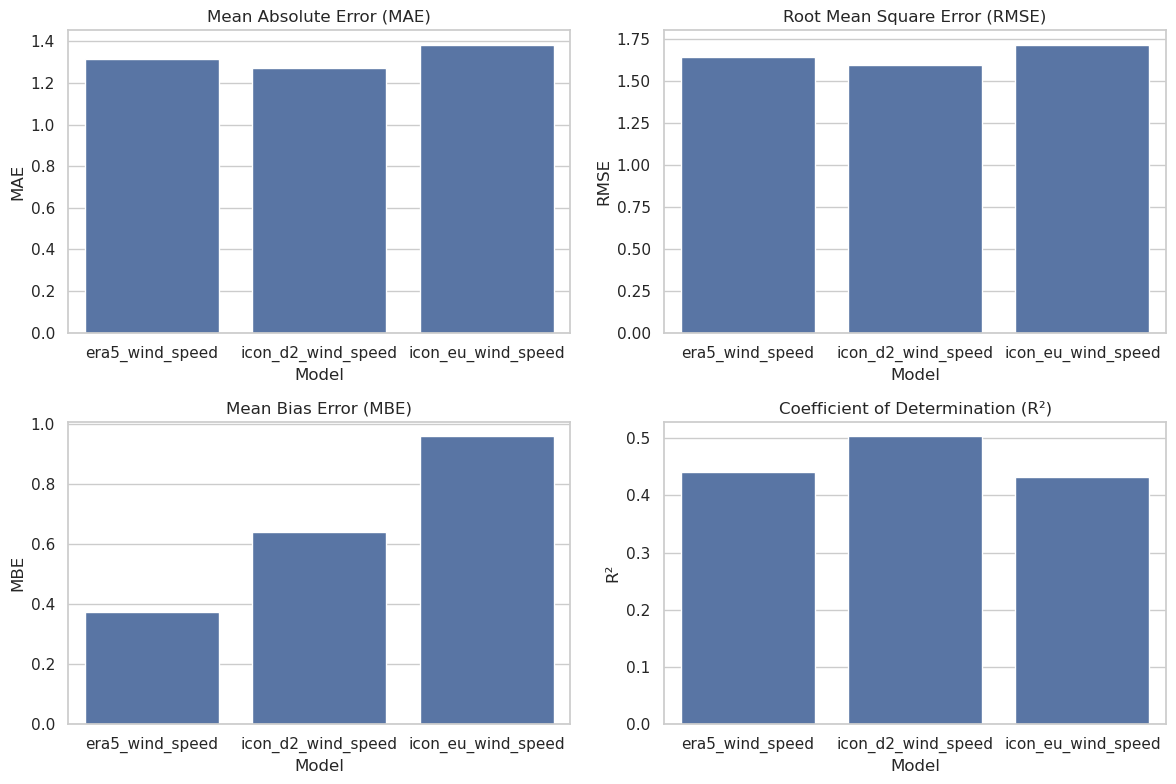

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# MAE
sns.barplot(x='Model', y='MAE', data=average_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean Absolute Error (MAE)')

# RMSE
sns.barplot(x='Model', y='RMSE', data=average_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Root Mean Square Error (RMSE)')

# MBE
sns.barplot(x='Model', y='MBE', data=average_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Mean Bias Error (MBE)')

# R²
sns.barplot(x='Model', y='R²', data=average_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Coefficient of Determination (R²)')

plt.tight_layout()
plt.show()


Conclusion:
ICON-D2 Wind Speed model appears to perform the best overall based on the provided metrics:
It has the lowest MAE and RMSE, indicating better accuracy and fewer large errors.
It has the highest R², indicating it explains the most variance in the observed data.
Although it has higher MBE compared to ERA5, the difference is not substantial, and the other metrics (MAE, RMSE, R²) favor ICON-D2.

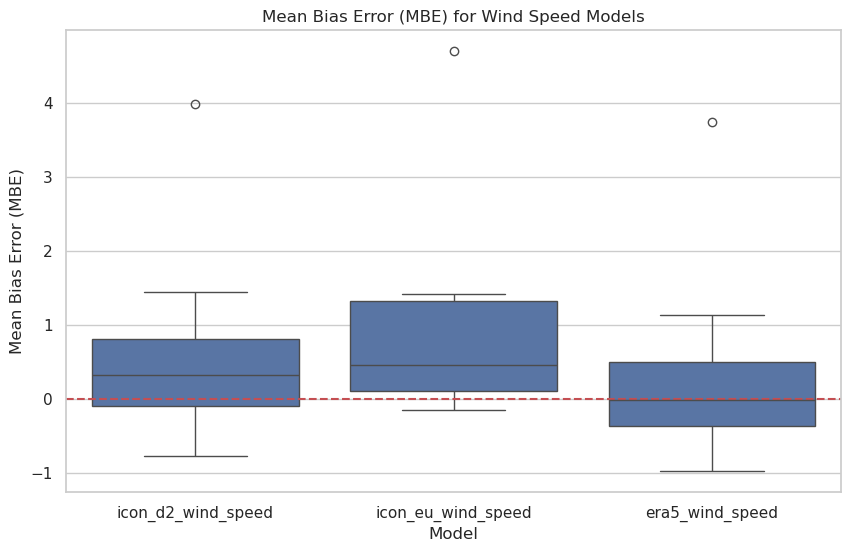

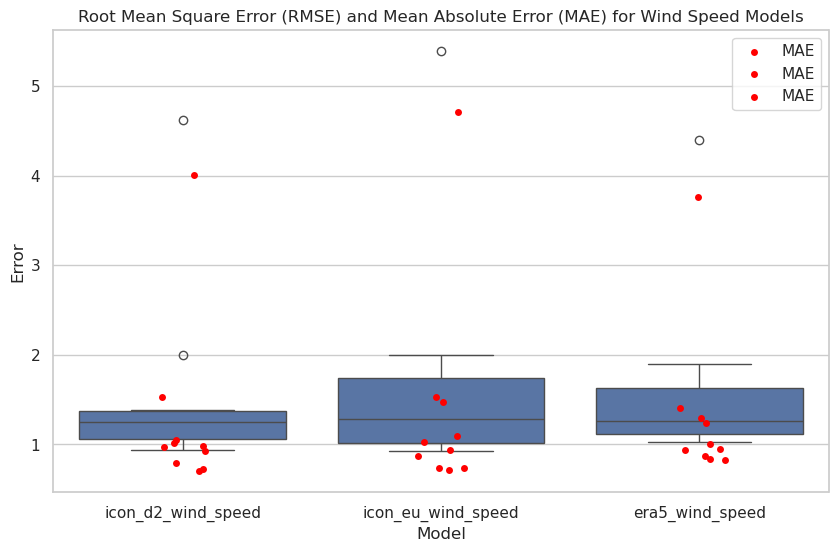

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting MBE (Bias)
plt.figure(figsize=(10, 6))
# fig, ax = plt.subplot(1,2,figsize = (10,6))
sns.boxplot(x='Model', y='MBE', data=df_metrics)
plt.title('Mean Bias Error (MBE) for Wind Speed Models')
plt.xlabel('Model')
plt.ylabel('Mean Bias Error (MBE)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plotting RMSE and MAE (Variance)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='RMSE', data=df_metrics)
sns.stripplot(x='Model', y='MAE', data=df_metrics, color='red', jitter=True, label='MAE')
plt.title('Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) for Wind Speed Models')
plt.xlabel('Model')
plt.ylabel('Error')
plt.legend()
plt.show()


/tmp/ipykernel_2487/2766373253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['MAE_rank'] = station_df['MAE'].rank(ascending=True)
/tmp/ipykernel_2487/2766373253.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['RMSE_rank'] = station_df['RMSE'].rank(ascending=True)
/tmp/ipykernel_2487/2766373253.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Ranked Models at Each Station:
    station_id       MAE      RMSE       MBE        R²               Model  \
0          303  0.730695  0.967633  0.221763  0.801366  icon_d2_wind_speed   
10         303  0.872368  1.152028  0.511553  0.720348  icon_eu_wind_speed   
20         303  0.871670  1.093292 -0.236154  0.736492     era5_wind_speed   
1          433  0.923416  1.178979  0.795159  0.614739  icon_d2_wind_speed   
11         433  1.095227  1.357205  1.031417  0.492852  icon_eu_wind_speed   
21         433  0.822740  1.029383  0.095528  0.694969     era5_wind_speed   
2          701  1.532301  2.003292  1.447151  0.568290  icon_d2_wind_speed   
12         701  1.525559  1.993358  1.418360  0.575461  icon_eu_wind_speed   
22         701  1.411806  1.895639  1.131967  0.598225     era5_wind_speed   
3         1200  1.019959  1.328577 -0.016061  0.833989  icon_d2_wind_speed   
13        1200  1.023267  1.344117  0.000133  0.831212  icon_eu_wind_speed   
23        1200  1.300004  1.64767

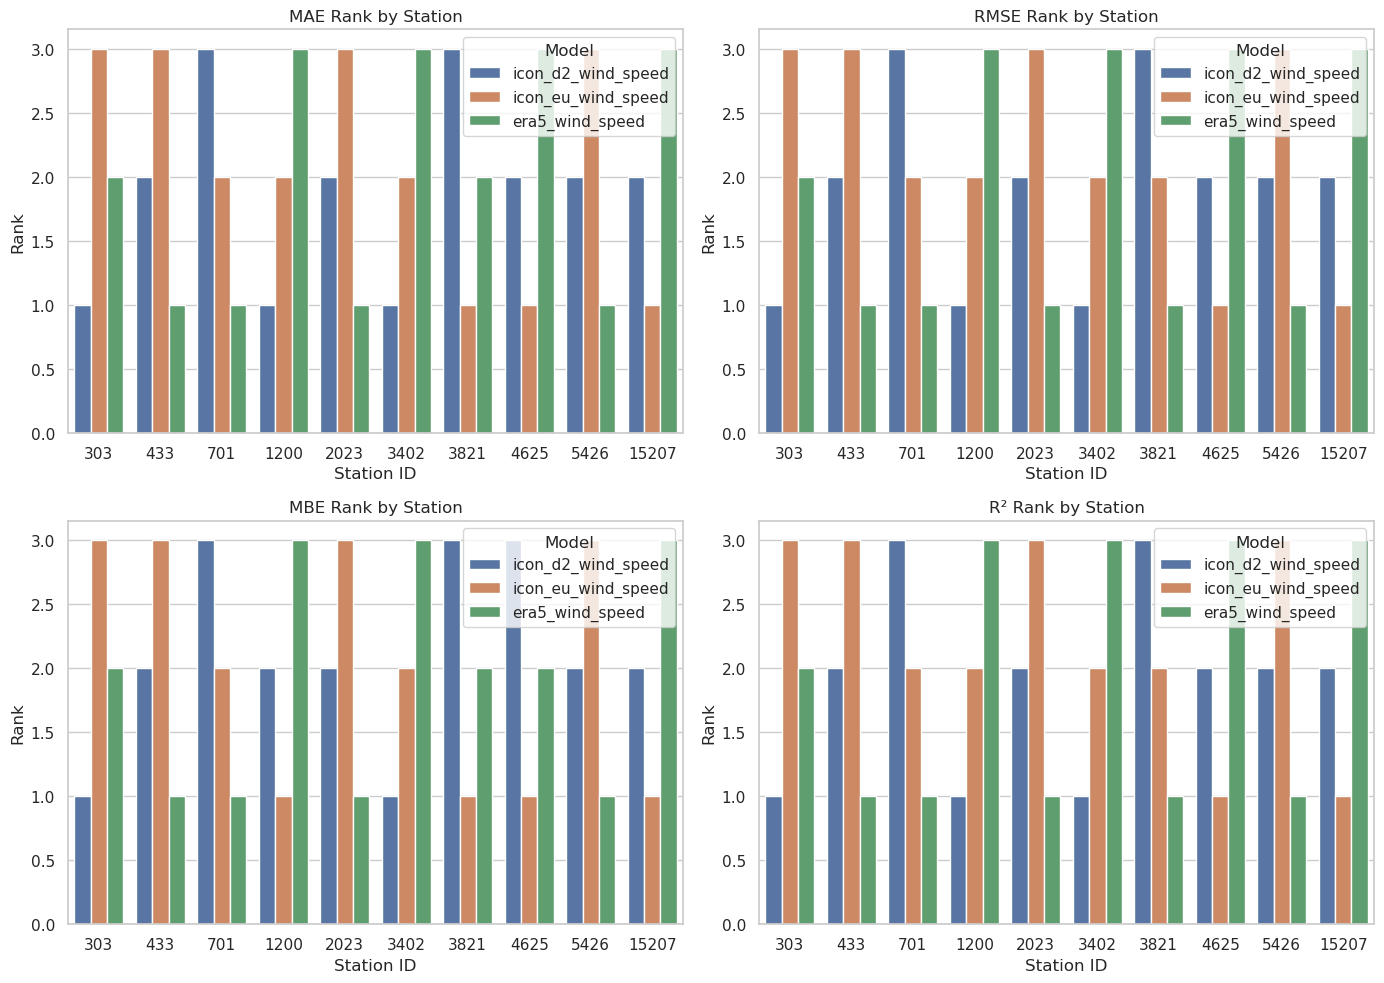

In [284]:
# Create DataFrame
df_metrics = pd.DataFrame(data)

# Function to rank models for each station
def rank_models(df):
    ranking_df = pd.DataFrame()
    
    # Iterate over each station
    for station in df['station_id'].unique():
        station_df = df[df['station_id'] == station]
        
        # Rank models for each metric (lower is better for MAE, RMSE, and MBE; higher is better for R²)
        station_df['MAE_rank'] = station_df['MAE'].rank(ascending=True)
        station_df['RMSE_rank'] = station_df['RMSE'].rank(ascending=True)
        station_df['MBE_rank'] = station_df['MBE'].abs().rank(ascending=True)  # Rank by absolute MBE
        station_df['R²_rank'] = station_df['R²'].rank(ascending=False)
        
        # Calculate overall rank by summing ranks
        station_df['Overall_rank'] = station_df[['MAE_rank', 'RMSE_rank', 'MBE_rank', 'R²_rank']].sum(axis=1)
        
        ranking_df = pd.concat([ranking_df, station_df])
    
    return ranking_df

# Rank models
df_ranked = rank_models(df_metrics)

# Identify the best model for each station
best_models = df_ranked.loc[df_ranked.groupby('station_id')['Overall_rank'].idxmin()]

print("Ranked Models at Each Station:")
print(df_ranked)

print("\nBest Model for Each Station:")
print(best_models)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")

# Plotting the ranks
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE Rank
sns.barplot(x='station_id', y='MAE_rank', hue='Model', data=df_ranked, ax=axes[0, 0])
axes[0, 0].set_title('MAE Rank by Station')
axes[0, 0].set_xlabel('Station ID')
axes[0, 0].set_ylabel('Rank')

# RMSE Rank
sns.barplot(x='station_id', y='RMSE_rank', hue='Model', data=df_ranked, ax=axes[0, 1])
axes[0, 1].set_title('RMSE Rank by Station')
axes[0, 1].set_xlabel('Station ID')
axes[0, 1].set_ylabel('Rank')

# MBE Rank
sns.barplot(x='station_id', y='MBE_rank', hue='Model', data=df_ranked, ax=axes[1, 0])
axes[1, 0].set_title('MBE Rank by Station')
axes[1, 0].set_xlabel('Station ID')
axes[1, 0].set_ylabel('Rank')

# R² Rank
sns.barplot(x='station_id', y='R²_rank', hue='Model', data=df_ranked, ax=axes[1, 1])
axes[1, 1].set_title('R² Rank by Station')
axes[1, 1].set_xlabel('Station ID')
axes[1, 1].set_ylabel('Rank')

plt.tight_layout()
plt.show()

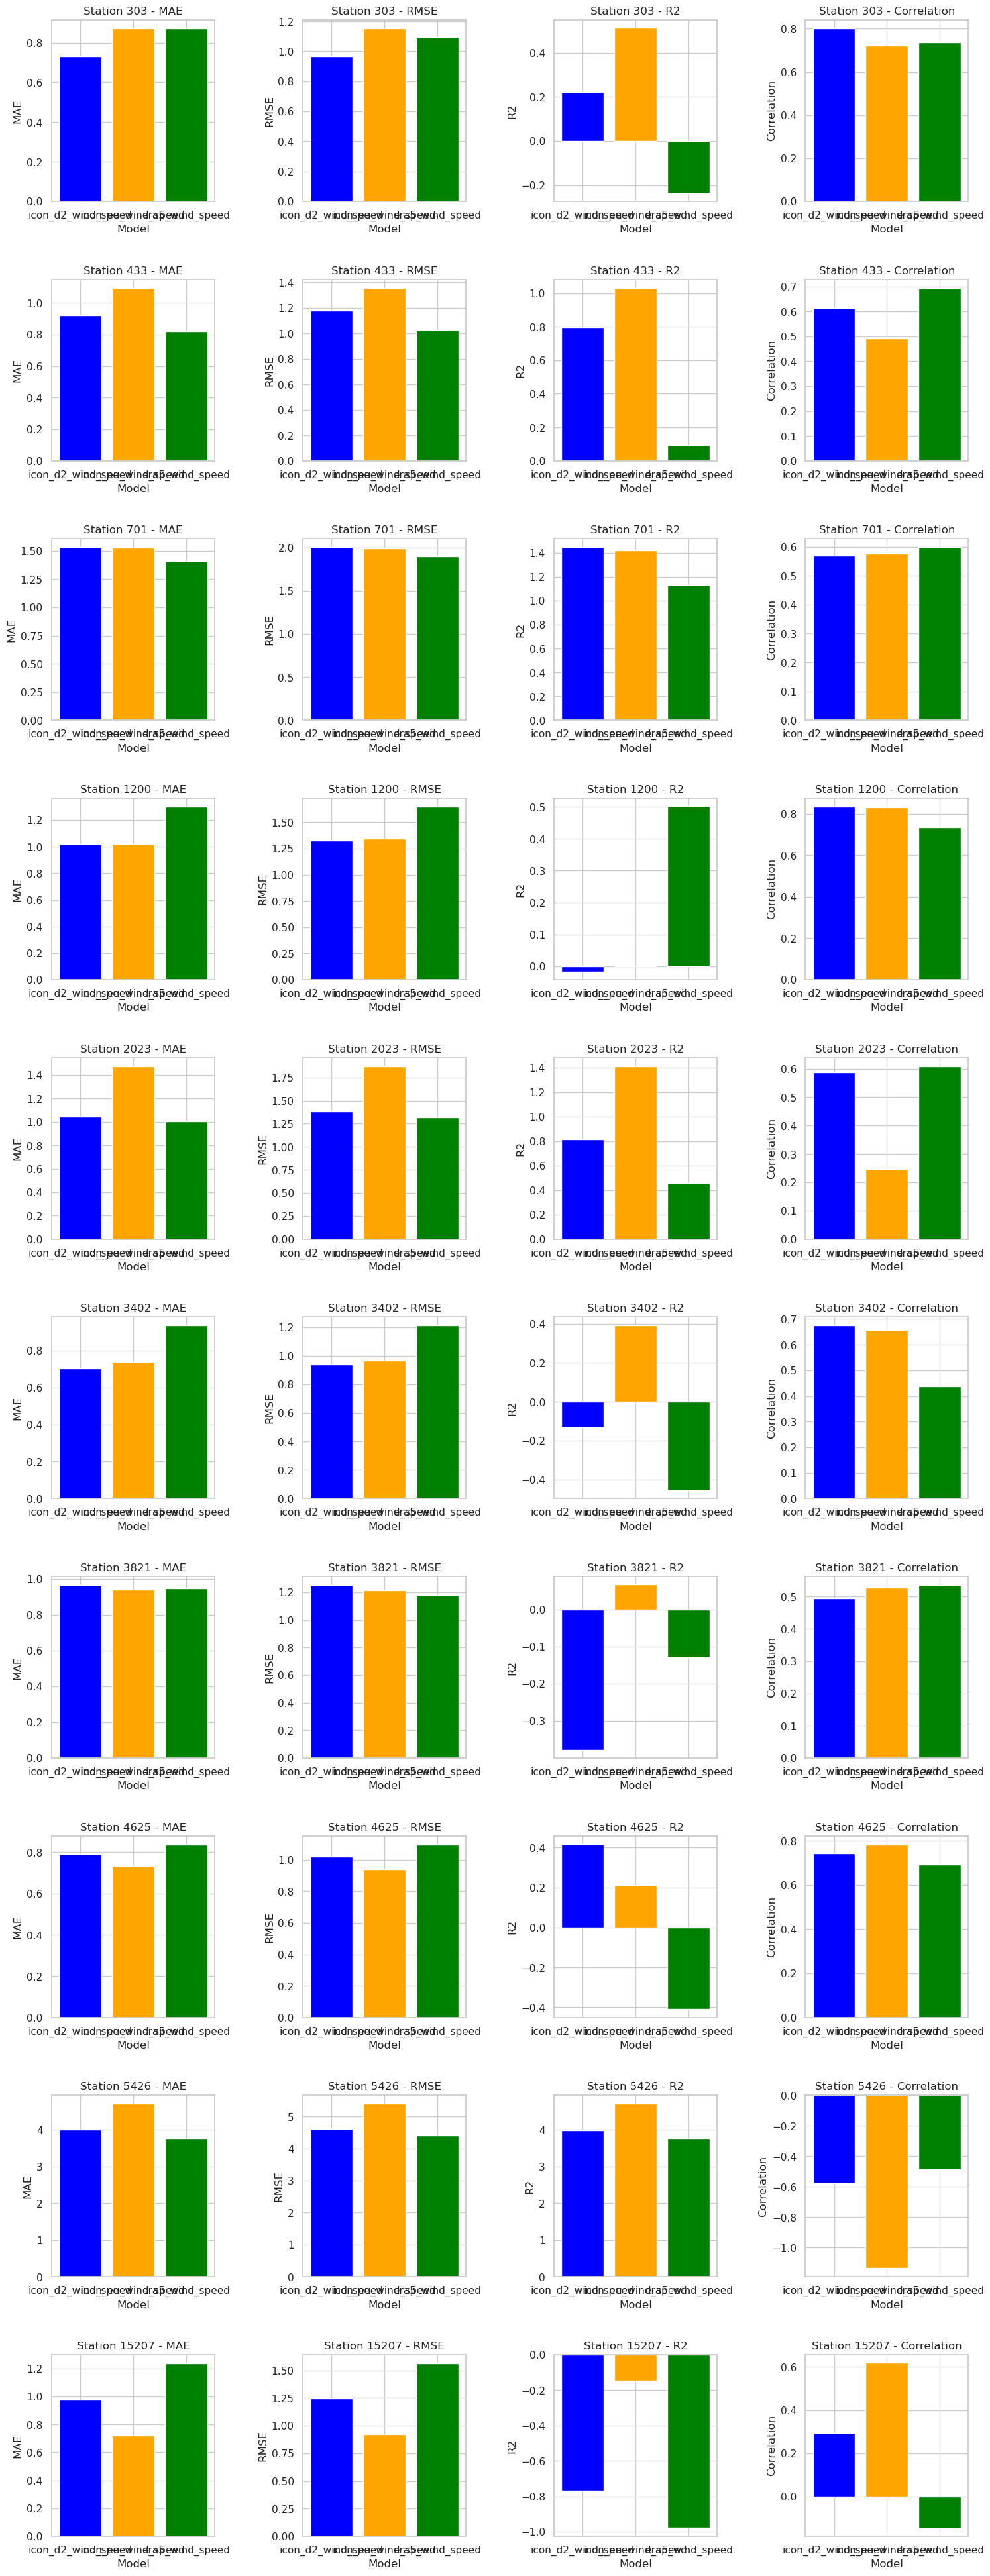

In [289]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.DataFrame({
    'station_id': [303, 433, 701, 1200, 2023, 3402, 3821, 4625, 5426, 15207] * 3,
    'MAE': [0.730695, 0.923416, 1.532301, 1.019959, 1.045081, 0.703184, 0.966428, 0.791453, 4.001448, 0.978444,
            0.872368, 1.095227, 1.525559, 1.023267, 1.475831, 0.739794, 0.941709, 0.734281, 4.703789, 0.718240,
            0.871670, 0.822740, 1.411806, 1.300004, 1.005135, 0.933787, 0.947752, 0.838104, 3.761541, 1.237076],
    'RMSE': [0.967633, 1.178979, 2.003292, 1.328577, 1.382139, 0.938096, 1.252929, 1.021088, 4.618054, 1.248492,
             1.152028, 1.357205, 1.993358, 1.344117, 1.872655, 0.964740, 1.214994, 0.939640, 5.389469, 0.921743,
             1.093292, 1.029383, 1.895639, 1.647675, 1.319232, 1.210228, 1.181704, 1.097068, 4.396054, 1.563233],
    'R2': [0.221763, 0.795159, 1.447151, -0.016061, 0.815017, -0.131685, -0.377686, 0.418061, 3.988107, -0.769118,
           0.511553, 1.031417, 1.418360, 0.000133, 1.412622, 0.392922, 0.066304, 0.211839, 4.698265, -0.146342,
           -0.236154, 0.095528, 1.131967, 0.501796, 0.457228, -0.454968, -0.128183, -0.409331, 3.745380, -0.977436],
    'Correlation': [0.801366, 0.614739, 0.568290, 0.833989, 0.587164, 0.674616, 0.495270, 0.741775, -0.577487, 0.295582,
                    0.720348, 0.492852, 0.575461, 0.831212, 0.247170, 0.658171, 0.528562, 0.783376, -1.134095, 0.618598,
                    0.736492, 0.694969, 0.598225, 0.734825, 0.609397, 0.437432, 0.535930, 0.690794, -0.485171, -0.146930],
    'Model': ['icon_d2_wind_speed']*10 + ['icon_eu_wind_speed']*10 + ['era5_wind_speed']*10
})

# Get the unique stations and models
stations = data['station_id'].unique()
models = data['Model'].unique()
metrics = ['MAE', 'RMSE', 'R2', 'Correlation']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(stations), ncols=len(metrics), figsize=(16, 40))
fig.tight_layout(pad=5.0)

# Iterate over each station and plot the metrics
for i, station in enumerate(stations):
    station_data = data[data['station_id'] == station]
    
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        ax.bar(station_data['Model'], station_data[metric], color=['blue', 'orange', 'green'])
        ax.set_title(f'Station {station} - {metric}')
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.grid(True)

plt.show()


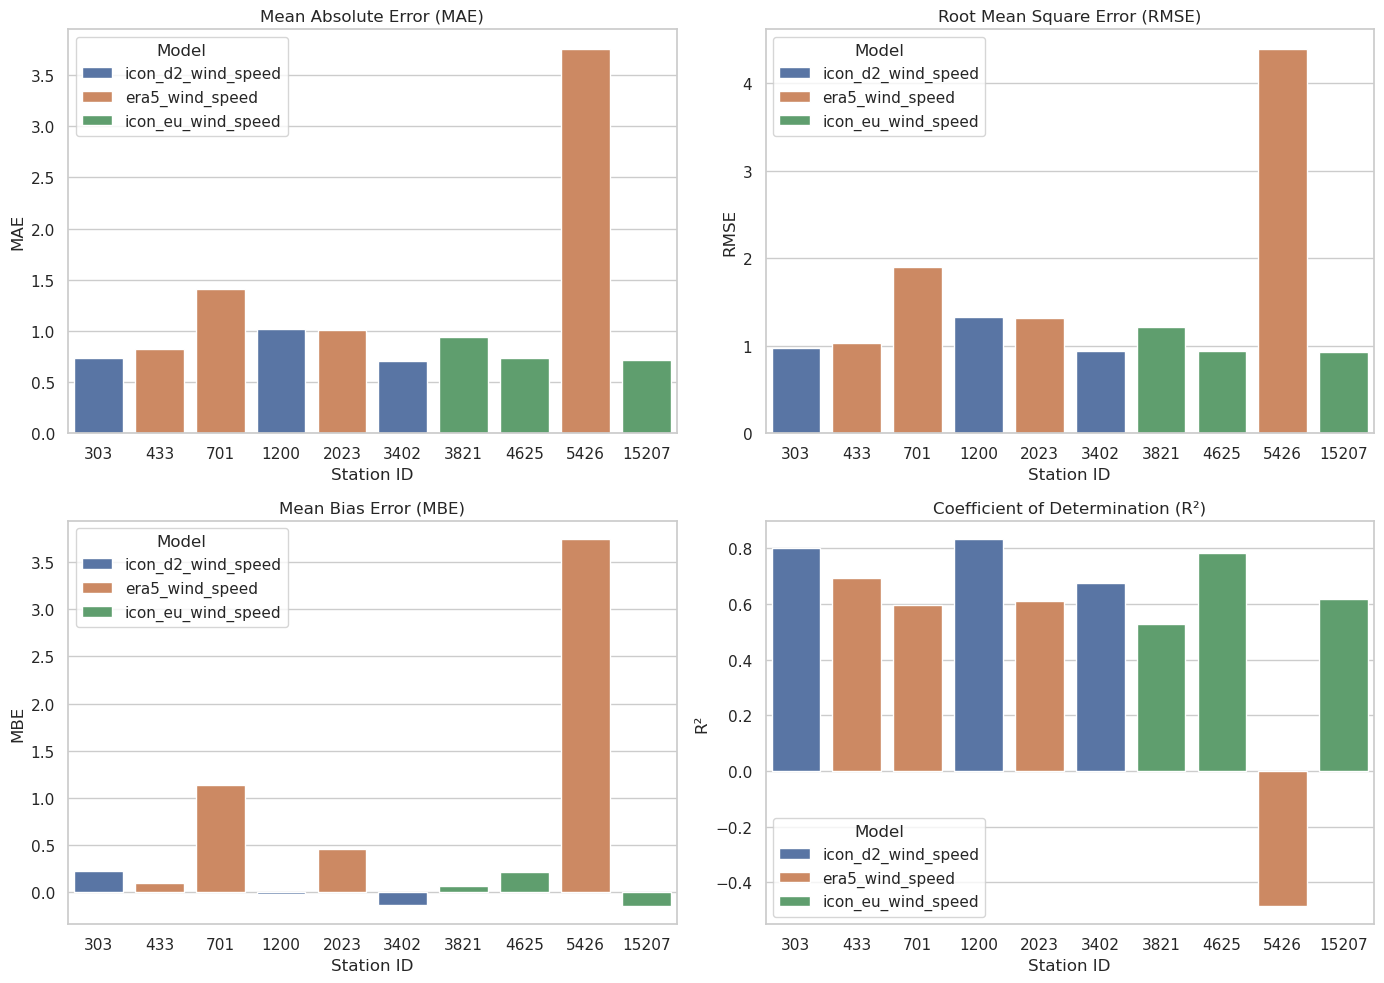

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provided data
data = {
    'station_id': [303, 433, 701, 1200, 2023, 3402, 3821, 4625, 5426, 15207],
    'MAE': [0.730695, 0.822740, 1.411806, 1.019959, 1.005135, 0.703184, 0.941709, 0.734281, 3.761541, 0.718240],
    'RMSE': [0.967633, 1.029383, 1.895639, 1.328577, 1.319232, 0.938096, 1.214994, 0.939640, 4.396054, 0.921743],
    'MBE': [0.221763, 0.095528, 1.131967, -0.016061, 0.457228, -0.131685, 0.066304, 0.211839, 3.745380, -0.146342],
    'R²': [0.801366, 0.694969, 0.598225, 0.833989, 0.609397, 0.674616, 0.528562, 0.783376, -0.485171, 0.618598],
    'Model': ['icon_d2_wind_speed', 'era5_wind_speed', 'era5_wind_speed', 'icon_d2_wind_speed', 'era5_wind_speed', 
              'icon_d2_wind_speed', 'icon_eu_wind_speed', 'icon_eu_wind_speed', 'era5_wind_speed', 'icon_eu_wind_speed']
}

# Create DataFrame
df_best_models = pd.DataFrame(data)

# Set up the seaborn style
sns.set(style="whitegrid")

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE
sns.barplot(x='station_id', y='MAE', hue='Model', data=df_best_models, ax=axes[0, 0])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xlabel('Station ID')
axes[0, 0].set_ylabel('MAE')

# RMSE
sns.barplot(x='station_id', y='RMSE', hue='Model', data=df_best_models, ax=axes[0, 1])
axes[0, 1].set_title('Root Mean Square Error (RMSE)')
axes[0, 1].set_xlabel('Station ID')
axes[0, 1].set_ylabel('RMSE')

# MBE
sns.barplot(x='station_id', y='MBE', hue='Model', data=df_best_models, ax=axes[1, 0])
axes[1, 0].set_title('Mean Bias Error (MBE)')
axes[1, 0].set_xlabel('Station ID')
axes[1, 0].set_ylabel('MBE')

# R²
sns.barplot(x='station_id', y='R²', hue='Model', data=df_best_models, ax=axes[1, 1])
axes[1, 1].set_title('Coefficient of Determination (R²)')
axes[1, 1].set_xlabel('Station ID')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()


In [253]:
def find_duplicate_columns(dataframe):
    """
    Identify and remove duplicate columns in a DataFrame.

    Args:
    dataframe (pd.DataFrame): The DataFrame to check for duplicate columns.

    Returns:
    list: A list of tuples where each tuple contains pairs of duplicate column names.

    This function checks for duplicate columns in a DataFrame by comparing
    each pair of columns. If two columns are identical, it adds the pair to
    a list of duplicates. It also removes the second column in each duplicate
    pair from the DataFrame.
    """
    duplicates = []
    columns = dataframe.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            if dataframe[col1].equals(dataframe[col2]):
                duplicates.append((col1, col2))
    return duplicates

# Find duplicate columns
duplicate_columns = find_duplicate_columns(df)

# duplicate columns and drop them
for col1, col2 in duplicate_columns:
    print(f"Columns '{col1}' and '{col2}' are identical. Dropping '{col2}'.")
    df = df.drop(columns=[col2])

In [254]:
df

measured_wind_direction_quality  \
station_id time                                                   
303        2023-01-01 00:00:00                             10.0   
           2023-01-01 01:00:00                             10.0   
           2023-01-01 02:00:00                             10.0   
           2023-01-01 03:00:00                             10.0   
           2023-01-01 04:00:00                             10.0   
...                                                         ...   
15207      2023-12-31 19:00:00                              1.0   
           2023-12-31 20:00:00                              1.0   
           2023-12-31 21:00:00                              1.0   
           2023-12-31 22:00:00                              1.0   
           2023-12-31 23:00:00                              1.0   

                                measured_wind_speed_quality  \
station_id time                                               
303        2023-01-01 00:00:00                         10.0   
           2023-01-01 01:00:00                         10.0   
           2023-01-01 02:00:00                         10.0   
           2023-01-01 03:00:00                         10.0   
           2023-01-01 04:00:00                         10.0   
...                                                     ...   
15207      2023-12-31 19:00:00                          1.0   
           2023-12-31 20:00:00                          1.0   
           2023-12-31 21:00:00                          1.0   
           2023-12-31 22:00:00                          1.0   
           2023-12-31 23:00:00                          1.0   

                                measured_wind_direction  measured_wind_speed  \
station_id time                                                                
303        2023-01-01 00:00:00                    230.0                  8.9   
           2023-01-01 01:00:00                    230.0                  8.5   
           2023-01-01 02:00:00                    230.0                  8.1   
           2023-01-01 03:00:00                    230.0                  7.7   
           2023-01-01 04:00:00                    220.0                  8.1   
...                                                 ...                  ...   
15207      2023-12-31 19:00:00                    180.0                  3.4   
           2023-12-31 20:00:00                    180.0                  4.0   
           2023-12-31 21:00:00                    190.0                  4.8   
           2023-12-31 22:00:00                    210.0                  4.9   
           2023-12-31 23:00:00                    200.0                  4.8   

                                station_longitude  station_latitude  \
station_id time                                                       
303        2023-01-01 00:00:00            13.4997         52.061298   
           2023-01-01 01:00:00            13.4997         52.061298   
           2023-01-01 02:00:00            13.4997         52.061298   
           2023-01-01 03:00:00            13.4997         52.061298   
           2023-01-01 04:00:00            13.4997         52.061298   
...                                           ...               ...   
15207      2023-12-31 19:00:00             9.3590         51.283501   
           2023-12-31 20:00:00             9.3590         51.283501   
           2023-12-31 21:00:00             9.3590         51.283501   
           2023-12-31 22:00:00             9.3590         51.283501   
           2023-12-31 23:00:00             9.3590         51.283501   

                                station_height              station_name  \
station_id time                                                            
303        2023-01-01 00:00:00            55.0                    Baruth   
           2023-01-01 01:00:00            55.0                    Baruth   
           2023-01-01 02:00:00            55.0                    Barut

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87600 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84765 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84765 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                87600 non-null  float32        
 5   station_latitude                 87600 non-null  float32        
 6   station_height                   87600 non-null  float64        
 7   station_name                     87600 non-null  object         
 8   state                            87600 non-null  object         
 9   era5_wind_speed                  86112 non

In [256]:
def clean_data(data, cols=None):
    """
    Clean the DataF by dropping rows with missing values.

    Args:
    data: The Data to clean.
    cols (list, optional): List of column names to check for missing values. 
                           If None, drops rows with any missing values across all columns.

    Returns:
    pd.DataFrame: A cleaned data with rows with missing values dropped.

    Example Usage:
    df_cleaned = clean_data(df, ['measured_wind_speed', 'measured_wind_direction'])
    print(df_cleaned.info())
    """
    if cols is not None:
        data_cleaned = data.dropna(subset=cols)
    else:
        data_cleaned = data.dropna()
    
    return data_cleaned


# Clean the Data based on specific columns
df1 = df.copy()
df_cleaned = clean_data(df1, ['measured_wind_speed', 'measured_wind_direction'])
df_cleaned.info()

# Clean the Data by removing rows with any missing values
# df_cleaned_all = clean_data(df)
# print(df_cleaned_all.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84722 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  84722 non-null  float64        
 1   measured_wind_speed_quality      84722 non-null  float64        
 2   measured_wind_direction          84722 non-null  float64        
 3   measured_wind_speed              84722 non-null  float64        
 4   station_longitude                84722 non-null  float32        
 5   station_latitude                 84722 non-null  float32        
 6   station_height                   84722 non-null  float64        
 7   station_name                     84722 non-null  object         
 8   state                            84722 non-null  object         
 9   era5_wind_speed                  84722 non

In [264]:
full_clean_data = clean_data(df_cleaned)

In [265]:
full_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 80987 entries, (303, Timestamp('2023-01-01 00:00:00')) to (15207, Timestamp('2023-12-31 23:00:00'))
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   measured_wind_direction_quality  80987 non-null  float64        
 1   measured_wind_speed_quality      80987 non-null  float64        
 2   measured_wind_direction          80987 non-null  float64        
 3   measured_wind_speed              80987 non-null  float64        
 4   station_longitude                80987 non-null  float32        
 5   station_latitude                 80987 non-null  float32        
 6   station_height                   80987 non-null  float64        
 7   station_name                     80987 non-null  object         
 8   state                            80987 non-null  object         
 9   era5_wind_speed                  80987 non

In [257]:
def duplicate_rows(data):
    """
    Find and count duplicate rows in the DataFrame.

    Args:
    data (pd.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows in the DataFrame.

    Example Usage:
    duplicate_count = count_duplicate_rows(data)
    print(f'Total number of duplicate rows: {duplicate_count}')
    """
    # Count the number of duplicate rows
    duplicate_count = data.duplicated().sum()

    return duplicate_count
# Find and count duplicate rows
duplicate_count = duplicate_rows(df)
print(f'Total number of duplicate rows: {duplicate_count}')

Total number of duplicate rows: 0


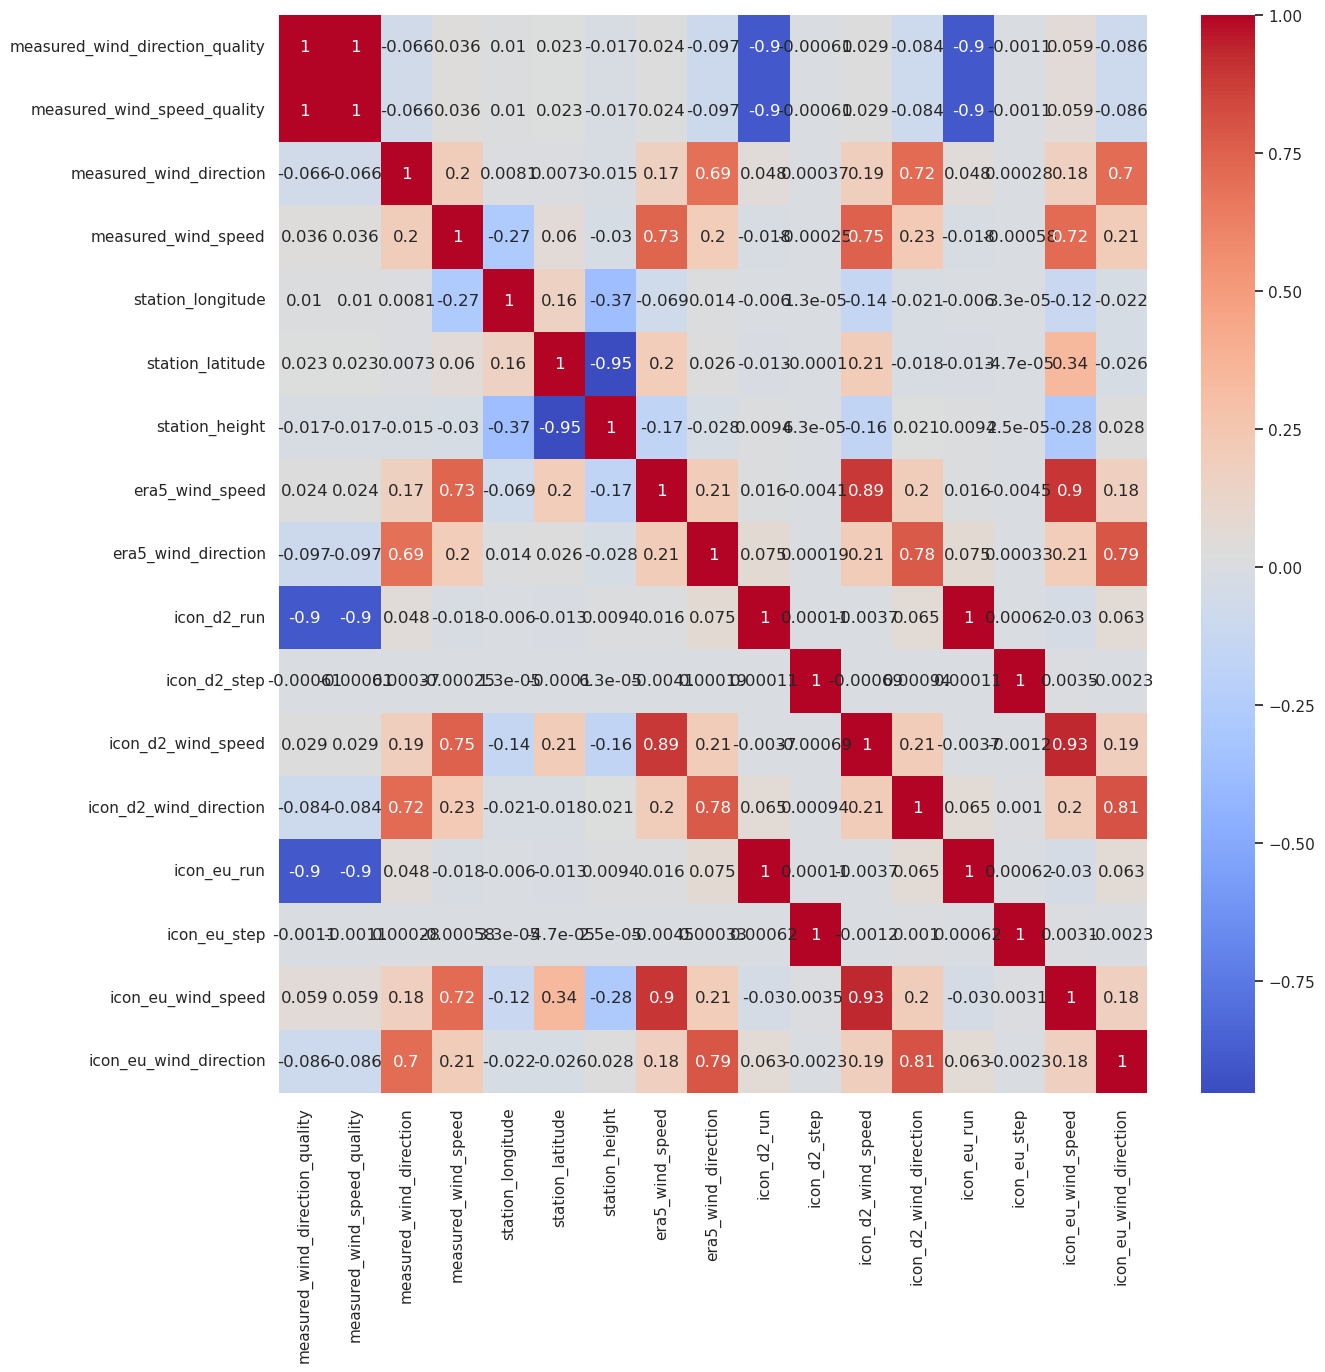

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df_drop = full_clean_data.drop(['state', 'station_name'], axis = 1)
# Compute the correlation matrix
corr_matrix = df_drop.corr()


# Plot the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [274]:
df_drop.columns

Index(['measured_wind_direction_quality', 'measured_wind_speed_quality',
       'measured_wind_direction', 'measured_wind_speed', 'station_longitude',
       'station_latitude', 'station_height', 'era5_wind_speed',
       'era5_wind_direction', 'icon_d2_run', 'icon_d2_step',
       'icon_d2_wind_speed', 'icon_d2_wind_direction', 'icon_eu_run',
       'icon_eu_step', 'icon_eu_wind_speed', 'icon_eu_wind_direction'],
      dtype='object')

In [281]:
df_drop.reset_index(inplace=True)
wind_speed_data = df_drop[['station_id','era5_wind_speed','icon_d2_wind_speed','icon_eu_wind_speed', 'measured_wind_speed']]
wind_direction_data = df_drop[['station_id','era5_wind_direction','icon_d2_wind_direction','icon_eu_wind_direction', 'measured_wind_direction']]

In [282]:
wind_speed_data

,station_id,era5_wind_speed,icon_d2_wind_speed,icon_eu_wind_speed,measured_wind_speed
0,303,7.449884,6.731338,6.162262,8.9
1,303,7.387481,6.974697,6.154730,8.5
2,303,7.182247,6.809517,5.927979,8.1
3,303,6.843245,6.157245,5.640130,7.7
4,303,6.511669,6.423289,5.907619,8.1
...,...,...,...,...,...
80982,15207,6.467078,4.552577,4.916092,3.4
80983,15207,6.631641,5.539249,5.301341,4.0
80984,15207,6.457904,5.838445,5.281361,4.8
80985,15207,5.555748,6.020338,5.198024,4.9


In [280]:
wind_speed_data

,station_id,time,station_longitude,station_latitude,era5_wind_speed,icon_d2_wind_speed,icon_eu_wind_speed,measured_wind_speed
0,303,2023-01-01 00:00:00,13.4997,52.061298,7.449884,6.731338,6.162262,8.9
1,303,2023-01-01 01:00:00,13.4997,52.061298,7.387481,6.974697,6.154730,8.5
2,303,2023-01-01 02:00:00,13.4997,52.061298,7.182247,6.809517,5.927979,8.1
3,303,2023-01-01 03:00:00,13.4997,52.061298,6.843245,6.157245,5.640130,7.7
4,303,2023-01-01 04:00:00,13.4997,52.061298,6.511669,6.423289,5.907619,8.1
...,...,...,...,...,...,...,...,...
80982,15207,2023-12-31 19:00:00,9.3590,51.283501,6.467078,4.552577,4.916092,3.4
80983,15207,2023-12-31 20:00:00,9.3590,51.283501,6.631641,5.539249,5.301341,4.0
80984,15207,2023-12-31 21:00:00,9.3590,51.283501,6.457904,5.838445,5.281361,4.8
80985,15207,2023-12-31 22:00:00,9.3590,51.283501,5.555748,6.020338,5.198024,4.9


In [283]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Define columns
feature_columns = ['station_id', 'era5_wind_speed', 'icon_d2_wind_speed', 'icon_eu_wind_speed']
target_column = 'measured_wind_speed'

# Normalize the features
scaler = MinMaxScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Function to create sequences
def create_sequences(data, feature_columns, target_column, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_columns].iloc[i:i + time_steps].values)
        y.append(data[target_column].iloc[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 10
X, y = create_sequences(data, feature_columns, target_column, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, len(feature_columns))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Optional: Predict
# predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions)


ModuleNotFoundError: No module named 'tensorflow'

In [331]:
y_true = 10 
y_pred = 320
np.mean(np.minimum(np.abs(y_true - y_pred), 360 - np.abs(y_true - y_pred)))

50.0

In [332]:
np.abs(((y_true - y_pred + 180) % 360) - 180)

50

In [327]:
import numpy as np

def circular_distance(angle1, angle2):
    """
    Calculate the circular distance between two angles.

    Args:
    angle1 (float): The first angle in degrees.
    angle2 (float): The second angle in degrees.

    Returns:
    float: The circular distance in degrees.
    """
    delta_orientation = angle1 - angle2
    delta = np.remainder(delta_orientation, 360)
    
    # Ensure the delta is within the range [-180, 180]
    if delta > 180:
        delta -= 360
    elif delta < -180:
        delta += 360
    
    return np.abs(delta)

# Example usage
angle1 = 50
angle2 = 320

distance = circular_distance(angle1, angle2)
print(f'Circular Distance: {distance} degrees')


Circular Distance: 90 degrees


In [323]:
def abs_angle(a):
    """
    Calculate the absolute angle in degrees.
    
    Args:
    a (float): Angle in degrees.
    
    Returns:
    float: Absolute angle in degrees.
    """
    return (360 + (a % 360)) % 360

def angle_delta(a, b):
    """
    Calculate the delta angle considering the circular nature of angles.
    
    Args:
    a (float): First angle in degrees.
    b (float): Second angle in degrees.
    
    Returns:
    float: Delta angle in degrees.
    """
    delta = abs(abs_angle(a) - abs_angle(b))
    sign = -1 if (abs_angle(a) > abs_angle(b) or delta >= 180) else 1
    return (180 - abs(delta - 180)) * sign

# Sample output
# for angle in range(-370, 371, 20):
#     test_angle = 10
#     print(f"{test_angle} -> {angle} = {angle_delta(test_angle, angle)}")
angle_delta(130,350)


-140